In [38]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer #операции со столбцами в дата фрейме
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error #классическая метрика
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df_nup = pd.read_excel("dataset/X_nup.xlsx")
df_bp = pd.read_excel("dataset/X_bp.xlsx")
df_merge = df_bp.merge(df_nup, on = 'Unnamed: 0', how = 'inner')
df = df_merge.drop(columns = ['Unnamed: 0'], axis = 1)
df['Угол нашивки, град'] = df['Угол нашивки, град'].astype('float64')
df.rename(columns = {'Соотношение матрица-наполнитель':'matrix_filler', 
                     'Плотность, кг/м3':'density', 'модуль упругости, ГПа':'elastic_modulus',
                     'Количество отвердителя, м.%':'hardener', 'Содержание эпоксидных групп,%_2':'epoxies', 
                     'Температура вспышки, С_2':'temp', 'Поверхностная плотность, г/м2':'surface_density', 
                     'Модуль упругости при растяжении, ГПа':'tensile_modulus',
                     'Прочность при растяжении, МПа':'tensile_strength', 'Потребление смолы, г/м2':'resin_consumption', 
                     'Угол нашивки, град':'patch_angle', 'Шаг нашивки':'patch_step', 'Плотность нашивки':'patch_density'},
          inplace = True )
data_claster = df.copy()

In [35]:
kmeans = KMeans(n_clusters=20, init='random', n_init=10, max_iter=300, tol=1e-04)
#kmeans_prediction = kmeans.fit_predict(data_claster)
kmeans.fit(data_claster)
y_kmeans = kmeans.predict(data_claster)

In [36]:
kmeans_prediction

array([10, 10, 10, ..., 13,  9, 14])

In [37]:
number_clast = pd.DataFrame(data = kmeans_prediction, columns = ['claster'])
data_claster = data_claster.join(number_clast)
data_claster.head()

,matrix_filler,density,elastic_modulus,hardener,epoxies,temp,surface_density,tensile_modulus,tensile_strength,resin_consumption,patch_angle,patch_step,patch_density,claster
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0,10
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0,10
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0,10
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0,10
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0,10


In [9]:
data_claster1 = data_claster.loc[(data_claster['claster'] == 0)]
data_claster2 = data_claster.loc[(data_claster['claster'] == 1)]
data_claster3 = data_claster.loc[(data_claster['claster'] == 2)]
data_claster4 = data_claster.loc[(data_claster['claster'] == 3)]
data_claster5 = data_claster.loc[(data_claster['claster'] == 4)]
data_claster6 = data_claster.loc[(data_claster['claster'] == 5)]
data_claster7 = data_claster.loc[(data_claster['claster'] == 6)]
data_claster8 = data_claster.loc[(data_claster['claster'] == 7)]
data_claster9 = data_claster.loc[(data_claster['claster'] == 8)]
data_claster10 = data_claster.loc[(data_claster['claster'] == 9)]
data_claster11 = data_claster.loc[(data_claster['claster'] == 10)]
data_claster12 = data_claster.loc[(data_claster['claster'] == 11)]
data_claster13 = data_claster.loc[(data_claster['claster'] == 12)]
data_claster14 = data_claster.loc[(data_claster['claster'] == 13)]
data_claster15 = data_claster.loc[(data_claster['claster'] == 14)]
data_claster16 = data_claster.loc[(data_claster['claster'] == 15)]
data_claster17 = data_claster.loc[(data_claster['claster'] == 16)]
data_claster18 = data_claster.loc[(data_claster['claster'] == 17)]
data_claster19 = data_claster.loc[(data_claster['claster'] == 18)]
data_claster20 = data_claster.loc[(data_claster['claster'] == 19)]

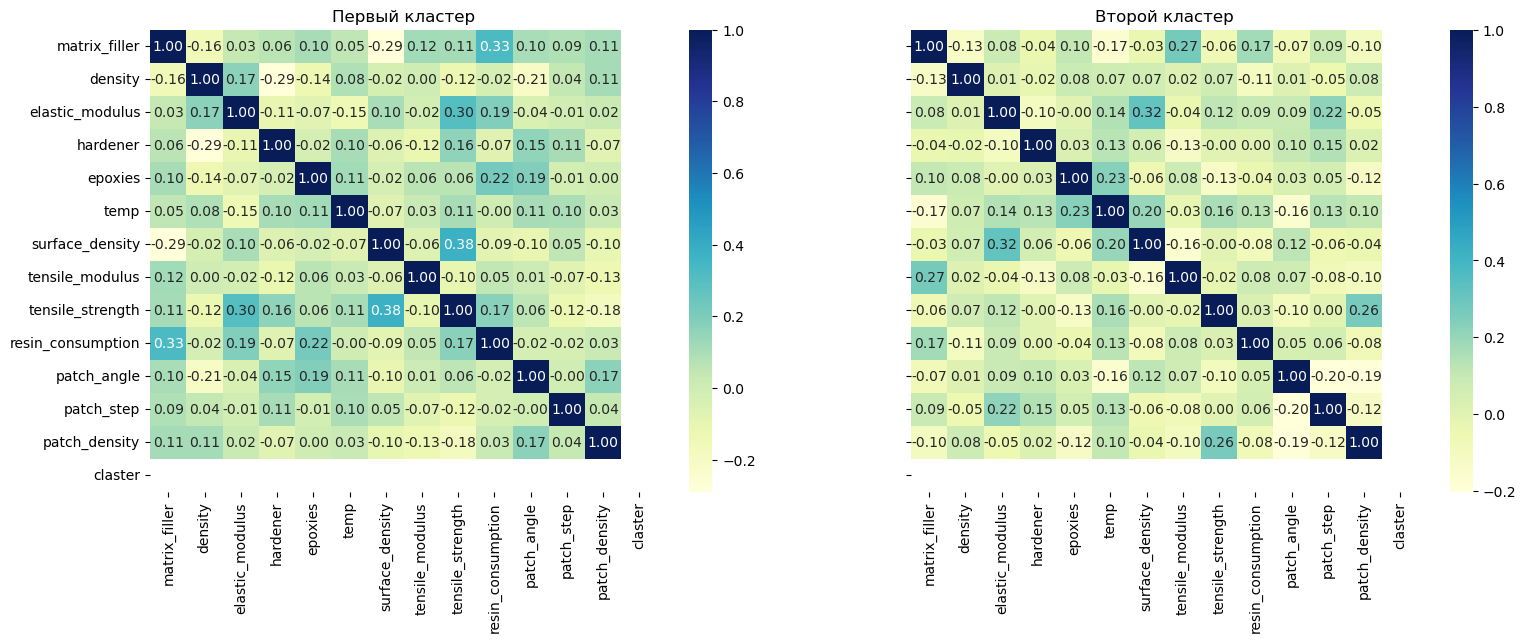

In [10]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(18,6))
sns.heatmap(data_claster1.corr(), ax=ax[0], cmap='YlGnBu', annot=True, fmt='.2f')
sns.heatmap(data_claster2.corr(), ax=ax[1], cmap='YlGnBu', annot=True, fmt='.2f')
ax[0].title.set_text('Первый кластер')
ax[1].title.set_text('Второй кластер')

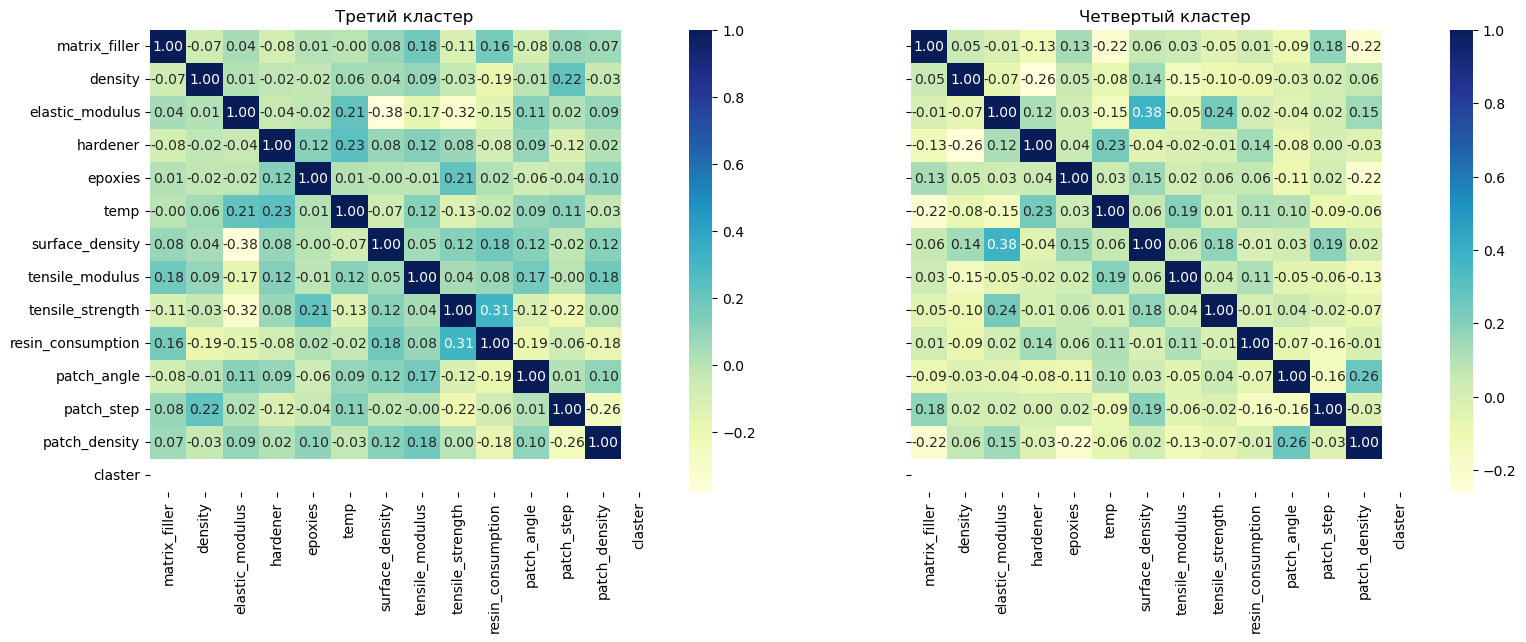

In [11]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(18,6))
sns.heatmap(data_claster3.corr(), ax=ax[0], cmap='YlGnBu', annot=True, fmt='.2f')
sns.heatmap(data_claster4.corr(), ax=ax[1], cmap='YlGnBu', annot=True, fmt='.2f')
ax[0].title.set_text('Третий кластер')
ax[1].title.set_text('Четвертый кластер')

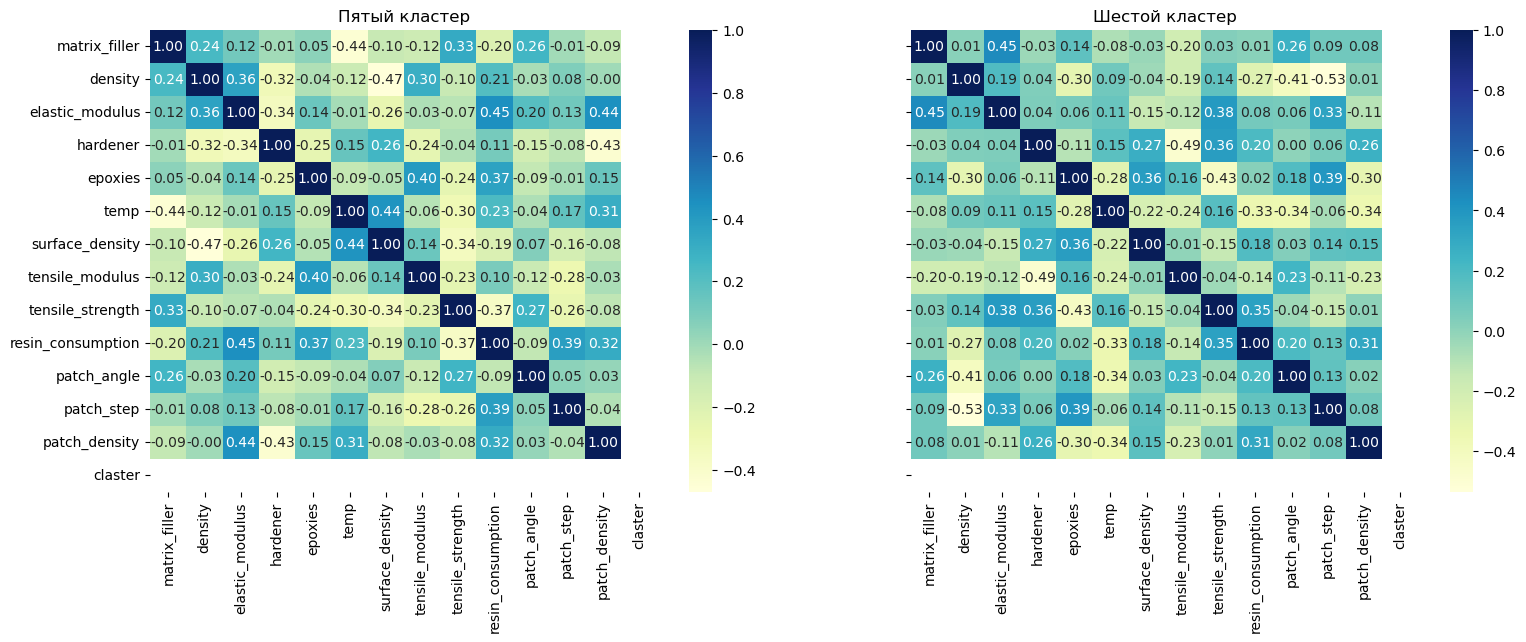

In [12]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(18,6))
sns.heatmap(data_claster5.corr(), ax=ax[0], cmap='YlGnBu', annot=True, fmt='.2f')
sns.heatmap(data_claster6.corr(), ax=ax[1], cmap='YlGnBu', annot=True, fmt='.2f')
ax[0].title.set_text('Пятый кластер')
ax[1].title.set_text('Шестой кластер')

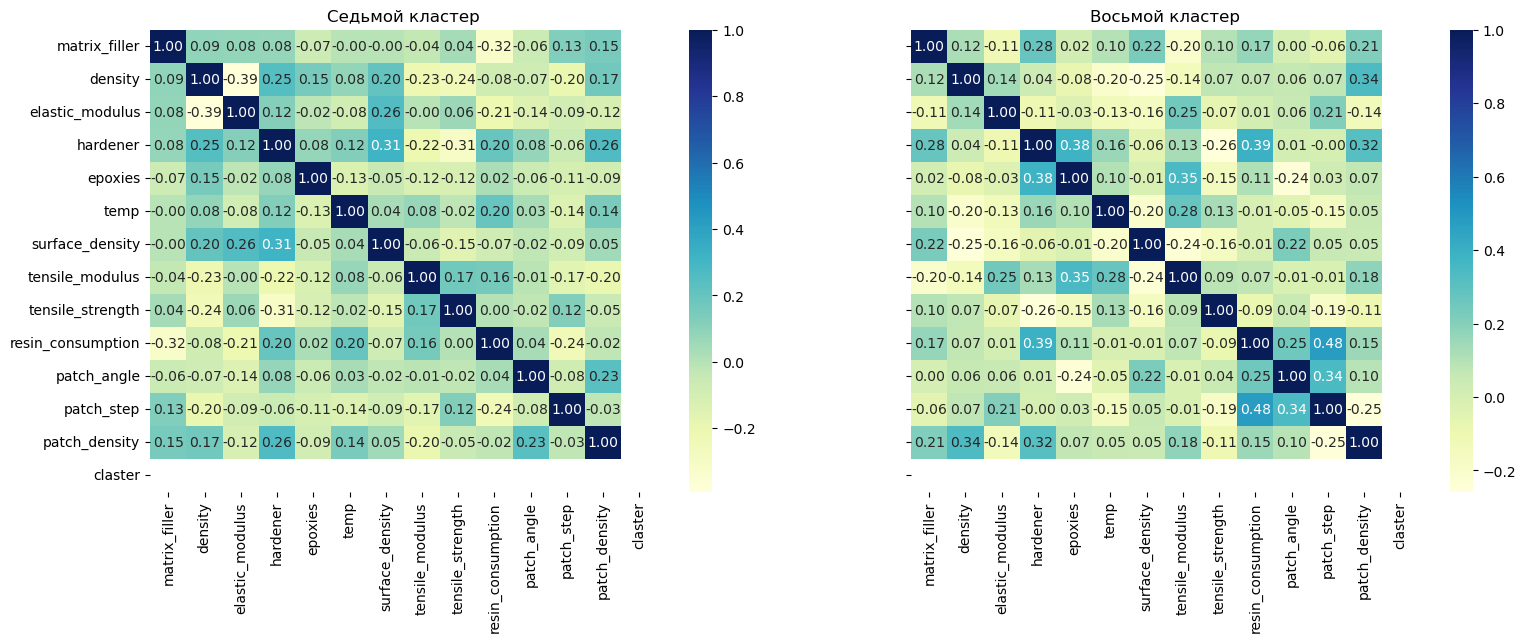

In [14]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(18,6))
sns.heatmap(data_claster7.corr(), ax=ax[0], cmap='YlGnBu', annot=True, fmt='.2f')
sns.heatmap(data_claster8.corr(), ax=ax[1], cmap='YlGnBu', annot=True, fmt='.2f')
ax[0].title.set_text('Седьмой кластер')
ax[1].title.set_text('Восьмой кластер')

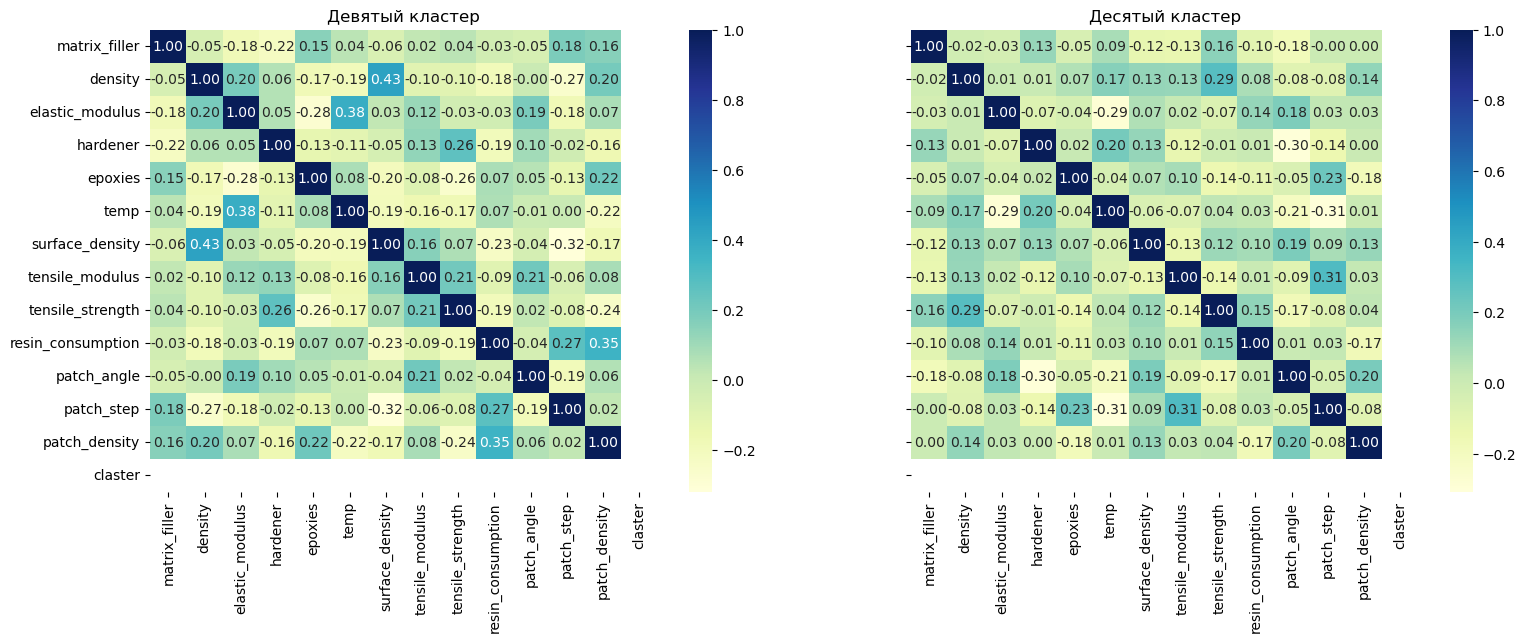

In [15]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(18,6))
sns.heatmap(data_claster9.corr(), ax=ax[0], cmap='YlGnBu', annot=True, fmt='.2f')
sns.heatmap(data_claster10.corr(), ax=ax[1], cmap='YlGnBu', annot=True, fmt='.2f')
ax[0].title.set_text('Девятый кластер')
ax[1].title.set_text('Десятый кластер')

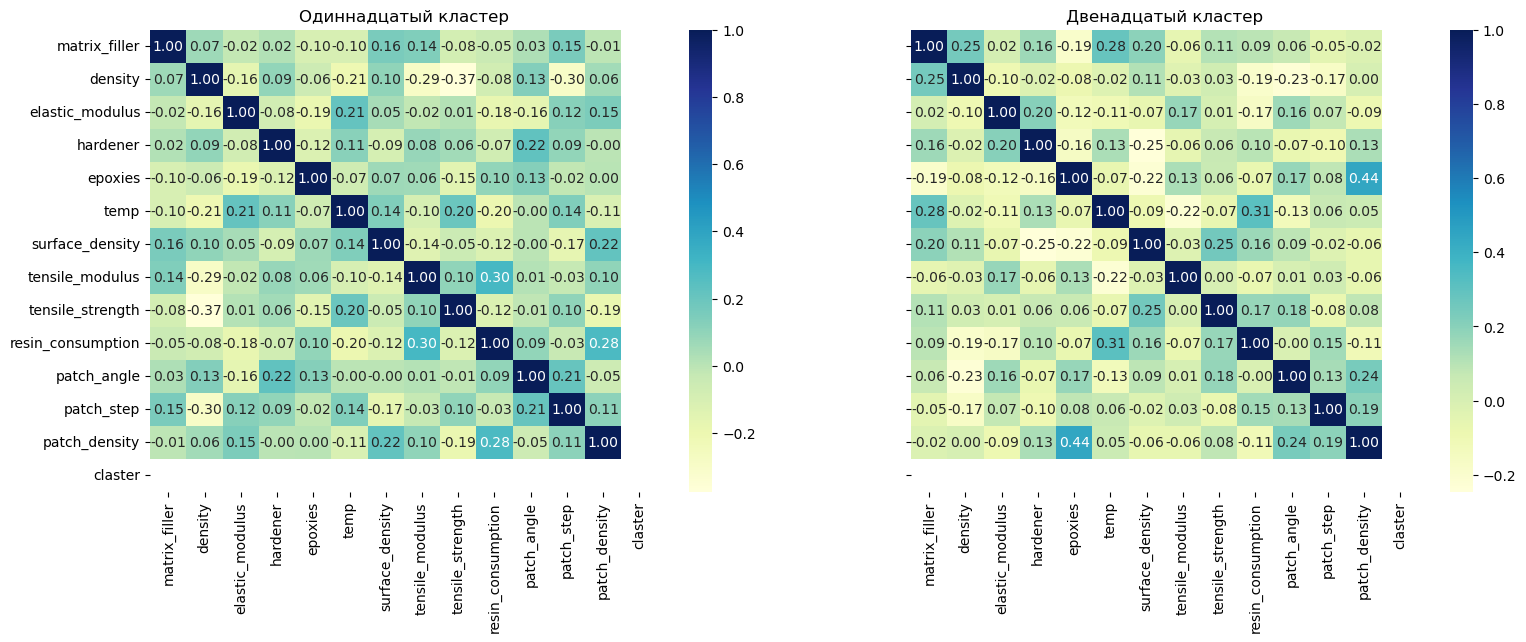

In [17]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(18,6))
sns.heatmap(data_claster11.corr(), ax=ax[0], cmap='YlGnBu', annot=True, fmt='.2f')
sns.heatmap(data_claster12.corr(), ax=ax[1], cmap='YlGnBu', annot=True, fmt='.2f')
ax[0].title.set_text('Одиннадцатый кластер')
ax[1].title.set_text('Двенадцатый кластер')

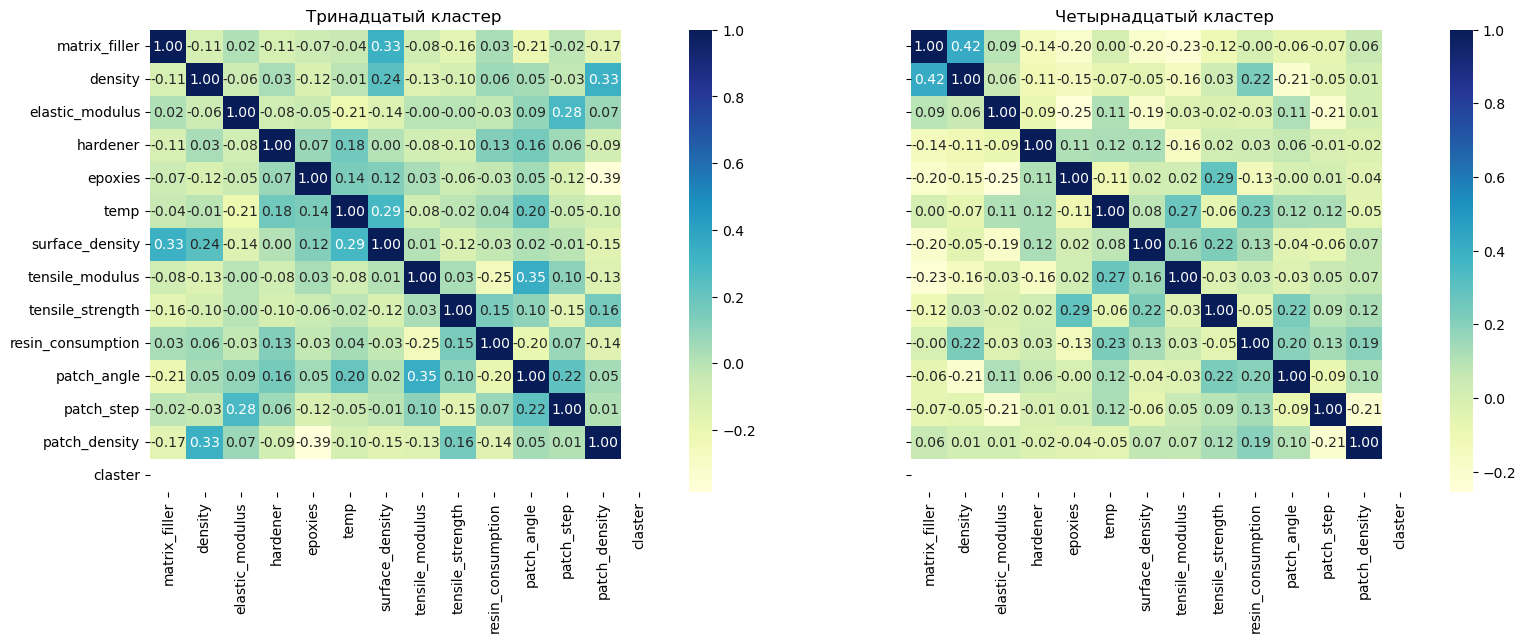

In [18]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(18,6))
sns.heatmap(data_claster13.corr(), ax=ax[0], cmap='YlGnBu', annot=True, fmt='.2f')
sns.heatmap(data_claster14.corr(), ax=ax[1], cmap='YlGnBu', annot=True, fmt='.2f')
ax[0].title.set_text('Тринадцатый кластер')
ax[1].title.set_text('Четырнадцатый кластер')

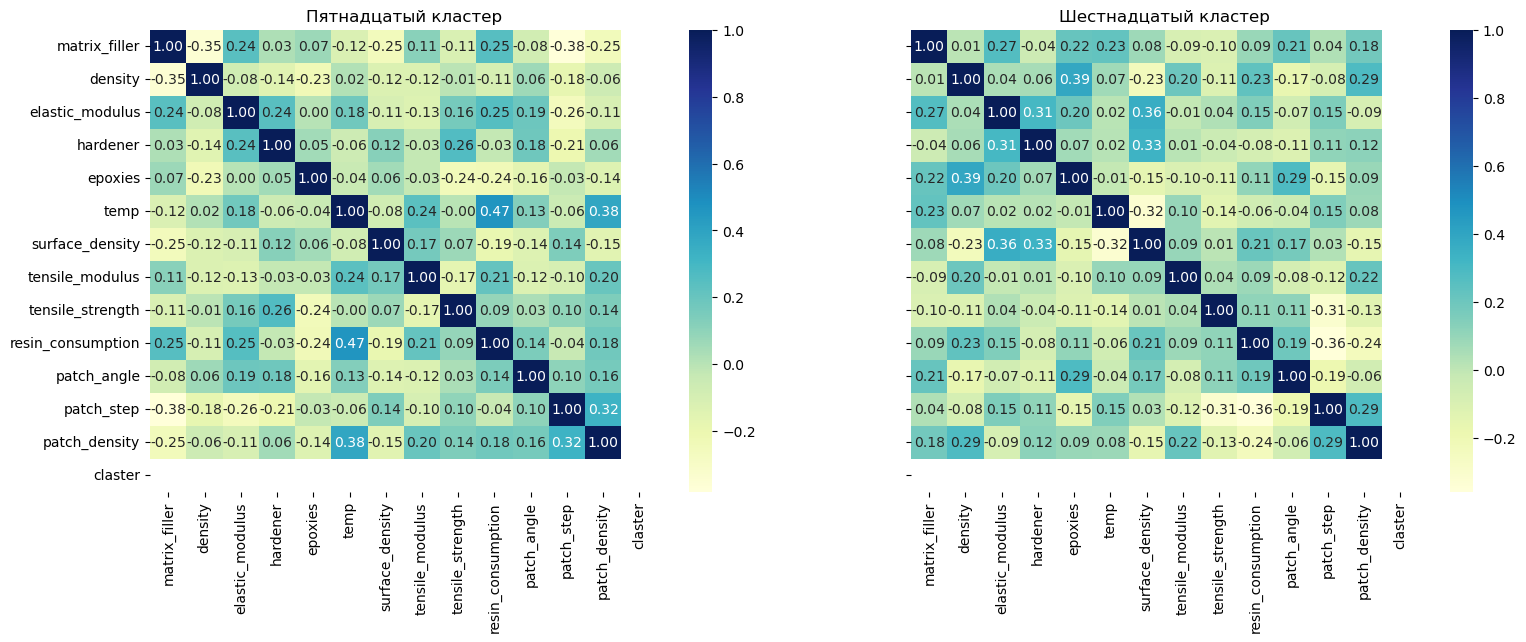

In [19]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(18,6))
sns.heatmap(data_claster15.corr(), ax=ax[0], cmap='YlGnBu', annot=True, fmt='.2f')
sns.heatmap(data_claster16.corr(), ax=ax[1], cmap='YlGnBu', annot=True, fmt='.2f')
ax[0].title.set_text('Пятнадцатый кластер')
ax[1].title.set_text('Шестнадцатый кластер')

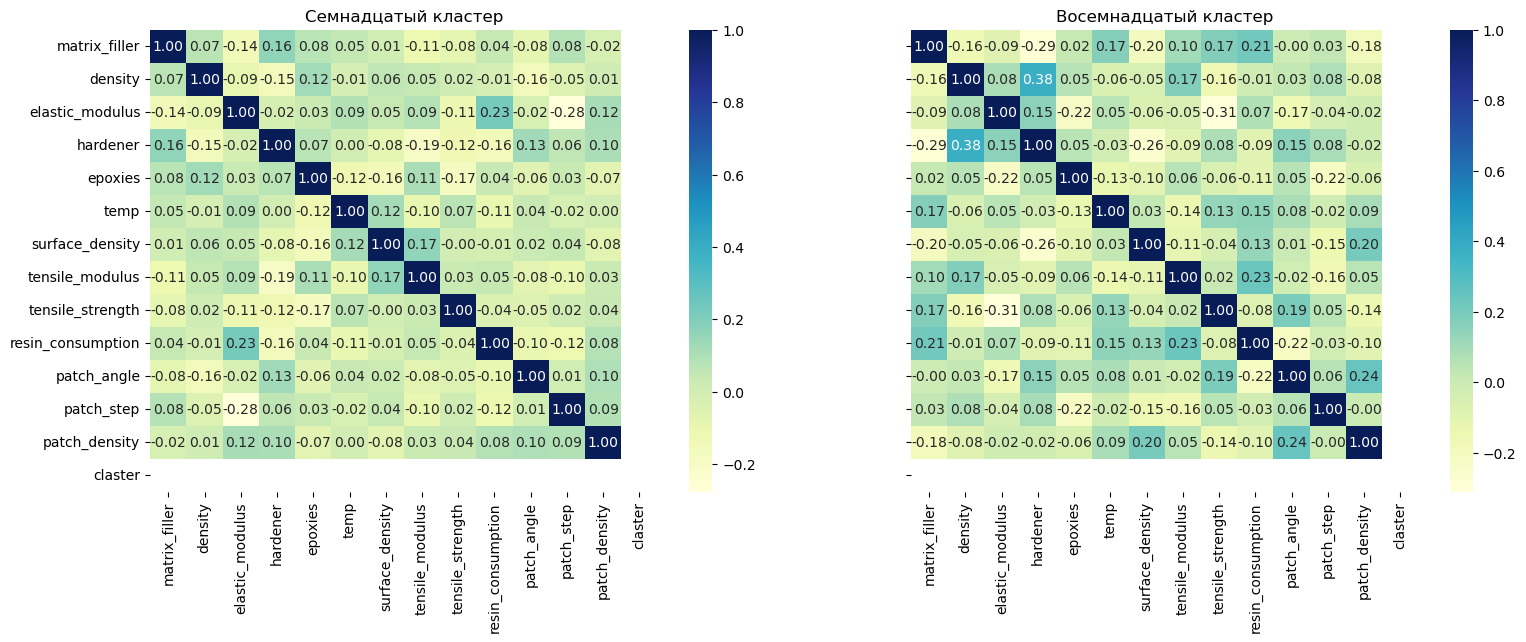

In [20]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(18,6))
sns.heatmap(data_claster17.corr(), ax=ax[0], cmap='YlGnBu', annot=True, fmt='.2f')
sns.heatmap(data_claster18.corr(), ax=ax[1], cmap='YlGnBu', annot=True, fmt='.2f')
ax[0].title.set_text('Семнадцатый кластер')
ax[1].title.set_text('Восемнадцатый кластер')

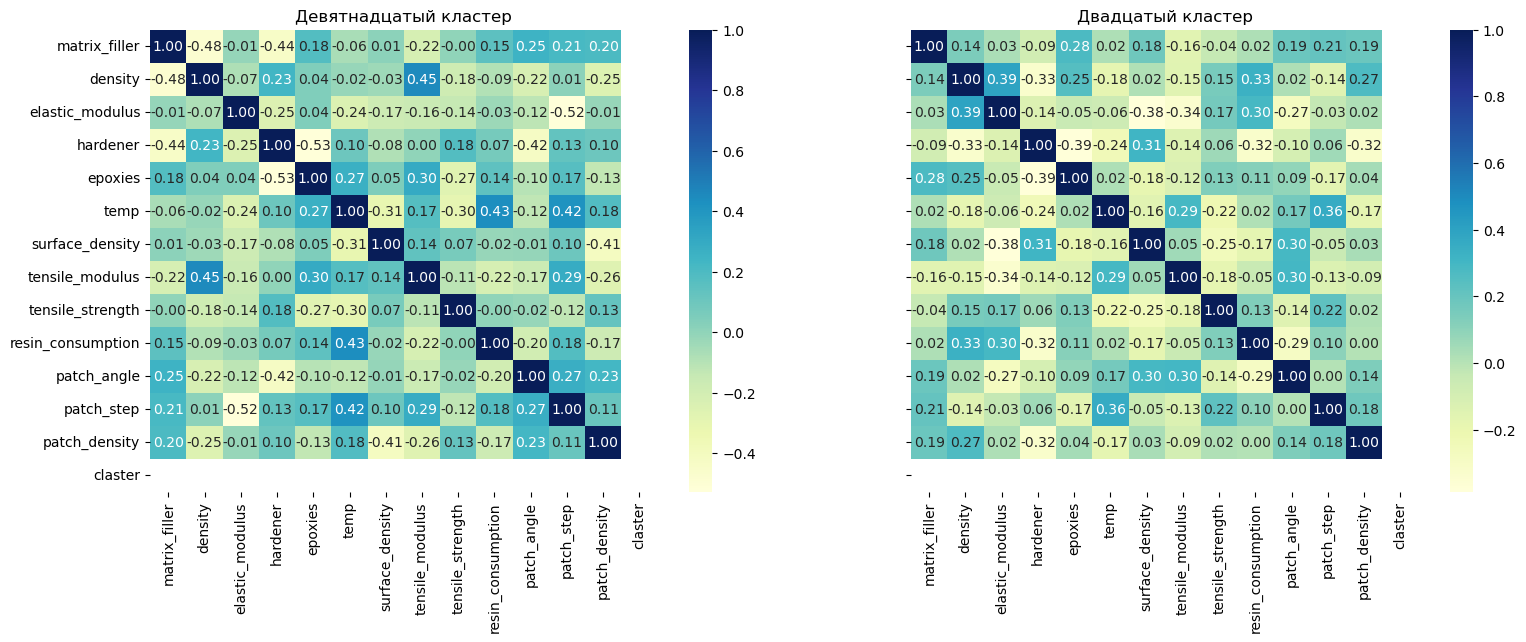

In [21]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(18,6))
sns.heatmap(data_claster19.corr(), ax=ax[0], cmap='YlGnBu', annot=True, fmt='.2f')
sns.heatmap(data_claster20.corr(), ax=ax[1], cmap='YlGnBu', annot=True, fmt='.2f')
ax[0].title.set_text('Девятнадцатый кластер')
ax[1].title.set_text('Двадцатый кластер')

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

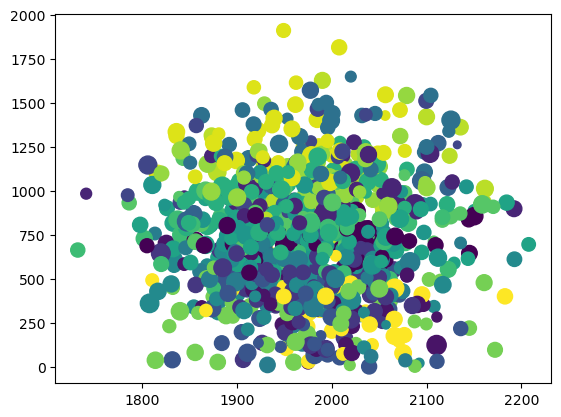

In [44]:
plt.scatter( data_claster['density'], data_claster['elastic_modulus'], data_claster['hardener'],  
            c = y_kmeans,
            cmap='viridis')
plt.grid

In [32]:
plt.scatter(data_claster['matrix_filler'], data_claster['density'], data_claster['elastic_modulus'], data_claster['hardener'], 
            data_claster['epoxies'], data_claster['temp'], data_claster['surface_density'], data_claster['tensile_modulus'], 
            data_claster['tensile_strength'], data_claster['resin_consumption'], data_claster['patch_angle'], 
            data_claster['patch_step'], data_claster['patch_density'],c = y_kmeans,
            cmap='viridis')
plt.grid

TypeError: scatter() got multiple values for argument 'c'